#Median filter with different window lengths (2015.10.08 DW KT)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import sys
sys.path.insert(0, 'C:\Users\Dominik\Documents\GitRep\kt-2015-DSPHandsOn\MedianFilter\Python') #Add a new path with needed .py files

import functions

In [2]:
% matplotlib inline

Here I'm plotting sine waves with different wave numbers. The different sine waves get median filtered and the filtered wave is displayed in the same plot. At least I am calculating the difference between the sine wave and the median filtered wave.

# Plot

Here you can see the result. The blue wave is the sine, green the filtered wave and red is the difference between sine wave and filtered wave.

NameError: global name 'medianFilteredPlotterImpl' is not defined

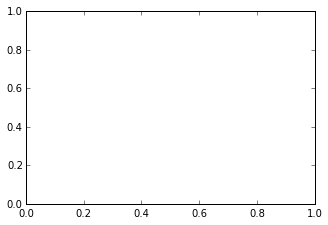

In [3]:
pp = PdfPages( 'median sin with different window lengths.pdf')
for z in range (2,9):  
    fig = plt.figure(z, figsize=(30,20)) #creating different figures in one plot, z is the window length
    for x in range(1, 5):
        for y in range(1, 6):
            plt.subplot(5, 5, x + (y-1)*4)  #creating different subplots in one figure, with x and y the wave number is calculated
            wavenum = (x-1) + (y-1)*4
            functions.medianSinPlot( wavenum, z )
            plt.suptitle('Median filtered sine waves with window length ' + str(z), fontsize = 60)
            plt.xlabel(("Wave number = "+str((x-1) + (y-1)*4)), fontsize=18)
    pp.savefig(fig)
pp.close()

#Illustrate the synchronisation problem

## Functions without synchronisation

In [39]:
def medianFilter1( data, windowLength ): 
    if (windowLength < len(data)and data.ndim == 1):
        tempret = np.zeros(len(data)-windowLength+1)  # creating an array where the filtered values will be saved in
        for c in range(0, len(tempret)):
            tempret[c] = np.median( data[ c : c + windowLength ] ) # write the values of the median filtered wave in tempret, calculate the median of all values in the window
        return tempret
        
    else:
         raise ValueError("windowLength must be smaller than len(data) and data must be a 1D array")

In [40]:
def medianSinPlot1( waveNumber, windowLength ):
    data = np.fromfunction( lambda x: np.sin((x-windowLength / 2)/128 * 2 * np.pi * waveNumber), (128 + windowLength / 2, ) )    #creating an array with a sine wave
    datafiltered = medianFilter1(data, windowLength)  #calculate the filtered wave with the medianFiltered function
    data = data[ windowLength / 2 : - windowLength ] # slice the data array to synchronize both waves
    datafiltered = datafiltered[ : len(data) ]       # cut the filtered wave to the same length as the data wave
    plt.plot( data )
    plt.plot( datafiltered )
    plt.plot( data-datafiltered )

Here you can see that the sine wave and filtered wave are asynchronous, when the window length is even. This bug leads to the difference between both waves being calculated wrong.

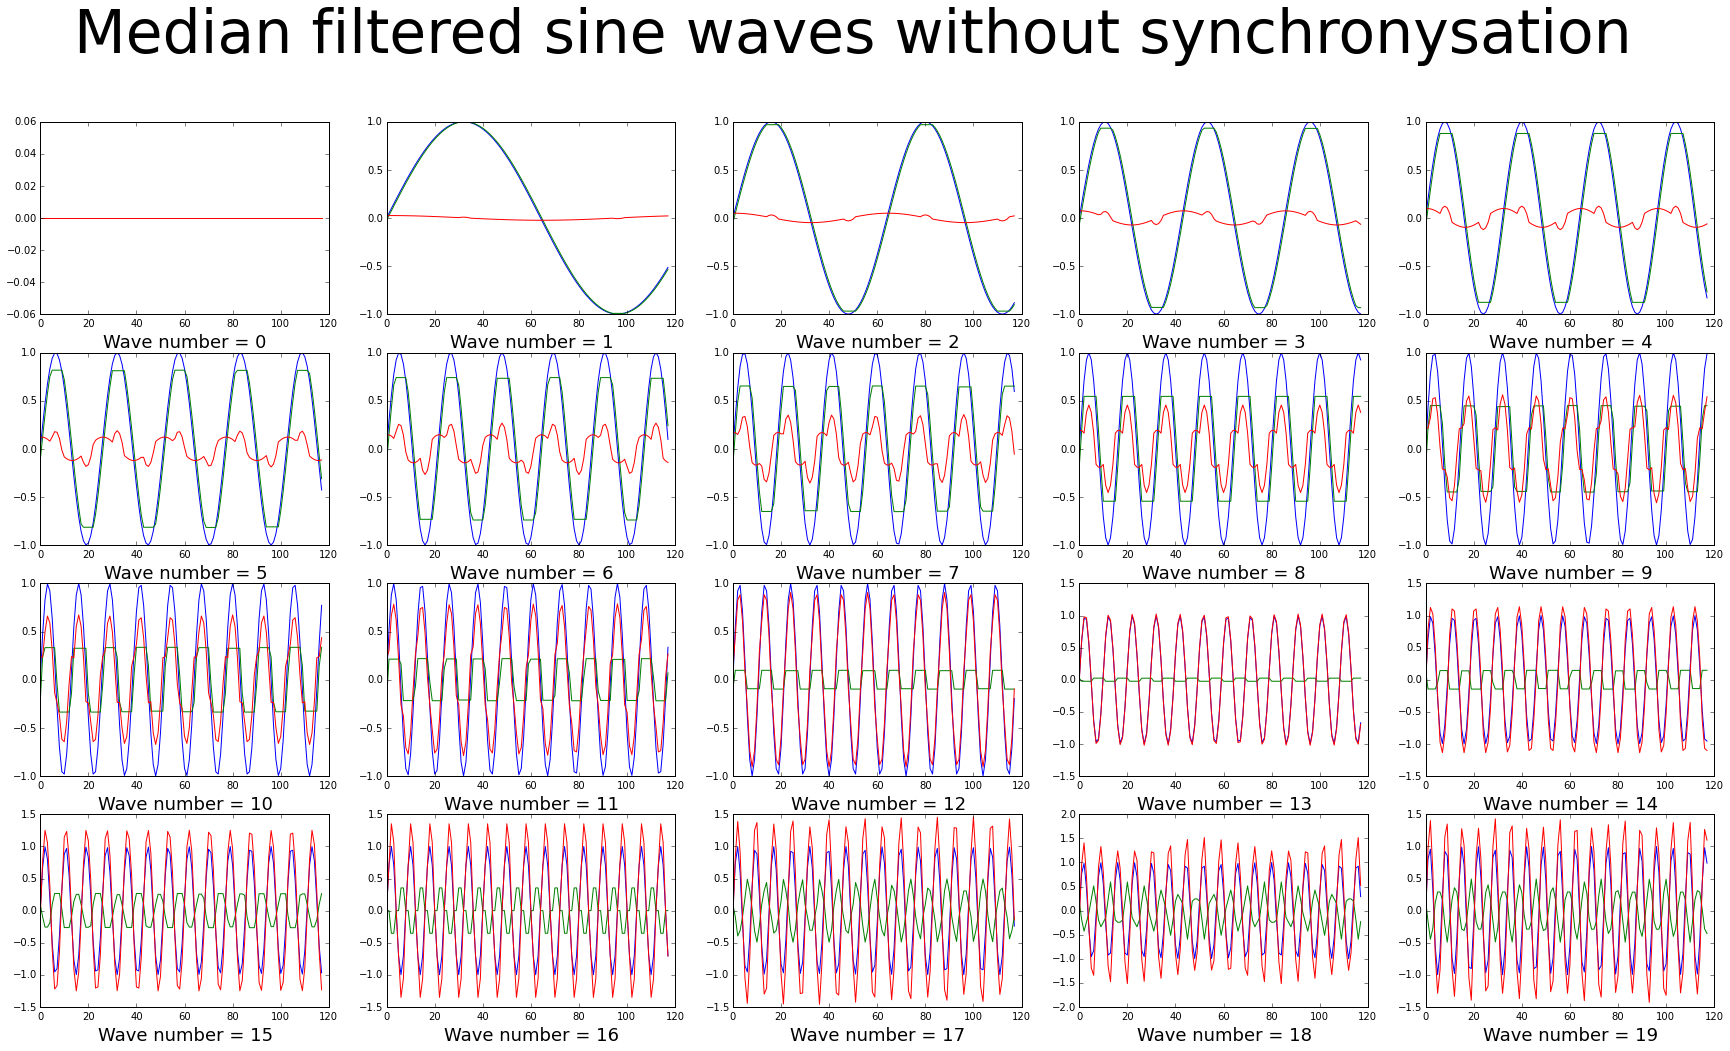

In [41]:
for z in range (10,11):  # window length 10
    fig = plt.figure(z, figsize=(30,20)) 
    for x in range(1, 5):
        for y in range(1, 6):
            plt.subplot(5, 5, x + (y-1)*4) 
            wavenum = (x-1) + (y-1)*4
            medianSinPlot1( wavenum, z )
            plt.suptitle('Median filtered sine waves without synchronization ', fontsize = 60)
            plt.xlabel(("Wave number = "+str((x-1) + (y-1)*4)), fontsize=18)

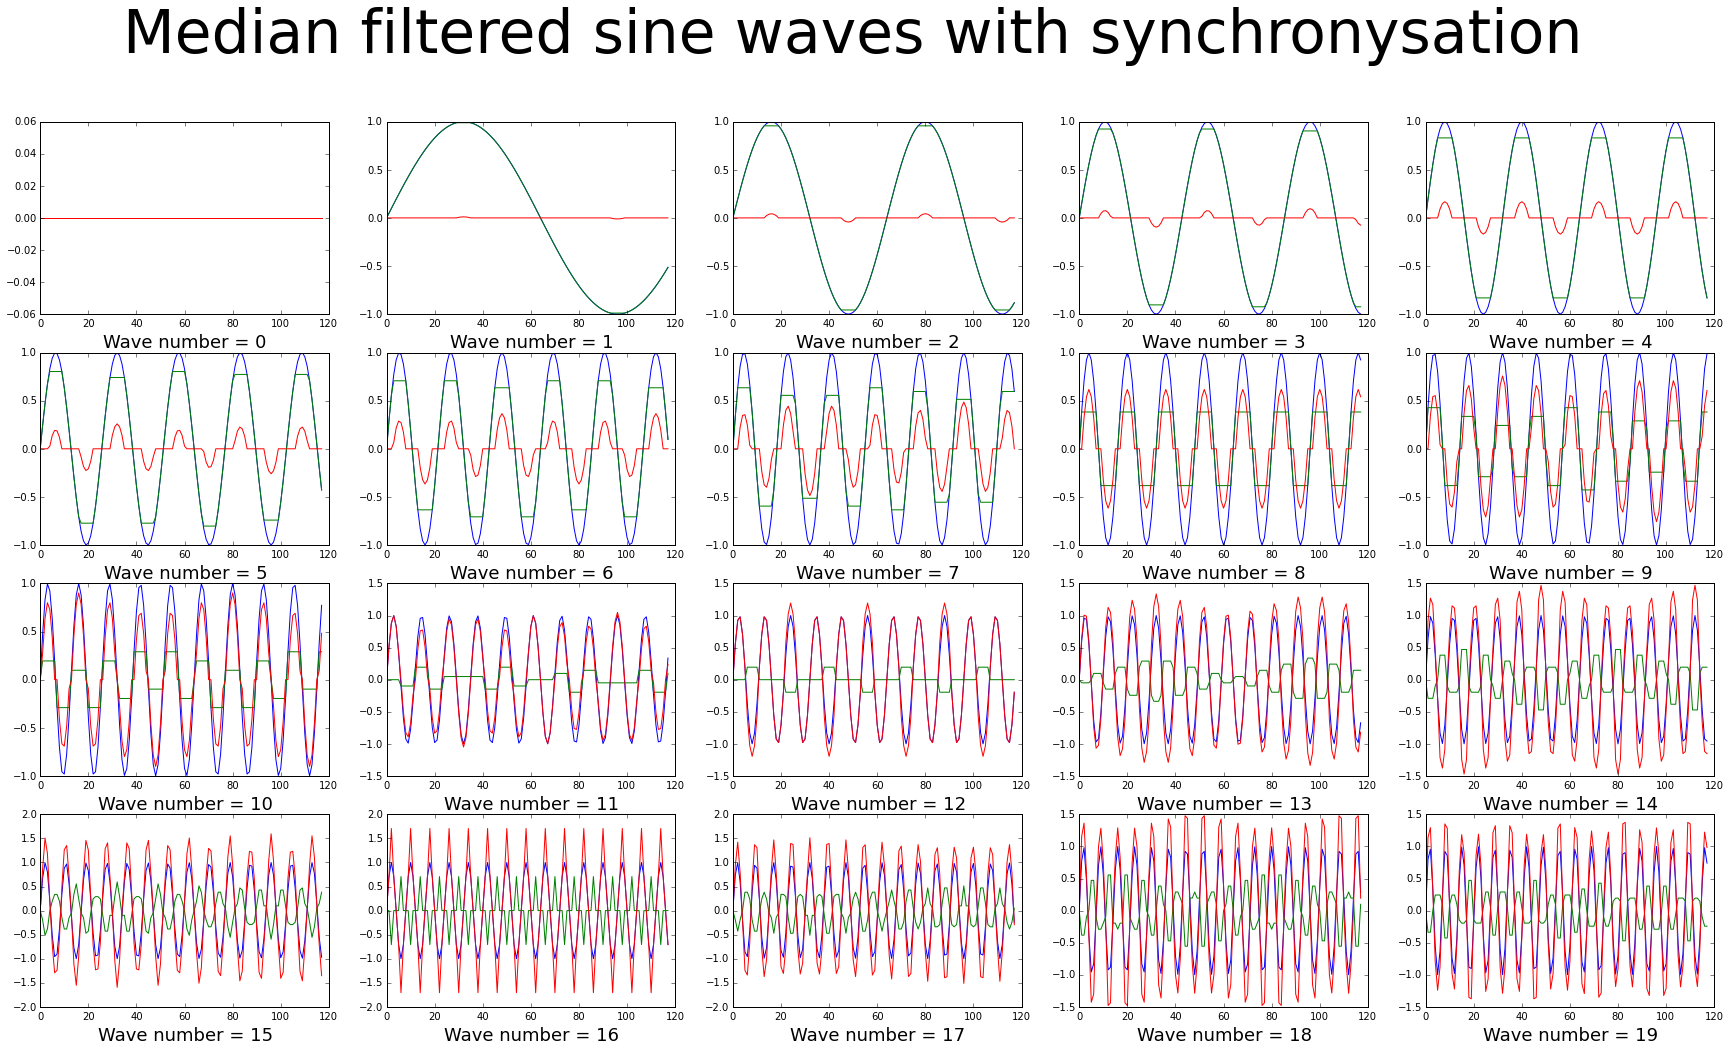

In [42]:
for z in range (10,11):  #calculated with window length 10
    fig = plt.figure(z, figsize=(30,20)) 
    for x in range(1, 5):
        for y in range(1, 6):
            plt.subplot(5, 5, x + (y-1)*4)  
            wavenum = (x-1) + (y-1)*4
            medianSinPlot( wavenum, z )
            plt.suptitle('Median filtered sine waves with synchronysation' , fontsize = 60)
            plt.xlabel(("Wave number = "+str((x-1) + (y-1)*4)), fontsize=18)